In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [14]:
goal_dist = 2.0
hypotenuse = 6.4 * 2**0.5
max_improv_per_step = 0.01  # 1 m/s for 0.01s
realistic_coef = 0.5
realistic_improv = max_improv_per_step * realistic_coef

In [15]:
realistic_iters = goal_dist / (max_improv_per_step * realistic_coef)
realistic_iters = int(realistic_iters)
realistic_iters 

400

## Difference of (scaled) normalized euclidean potentials

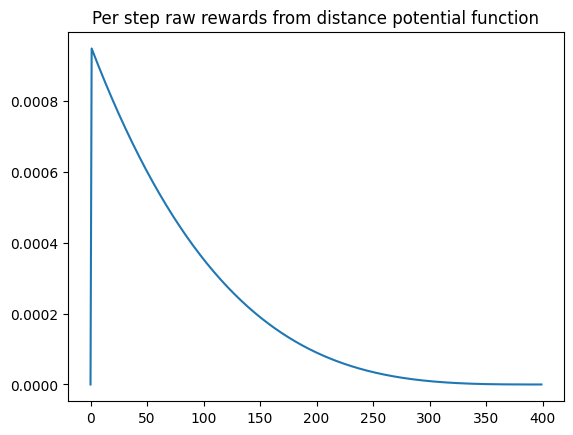

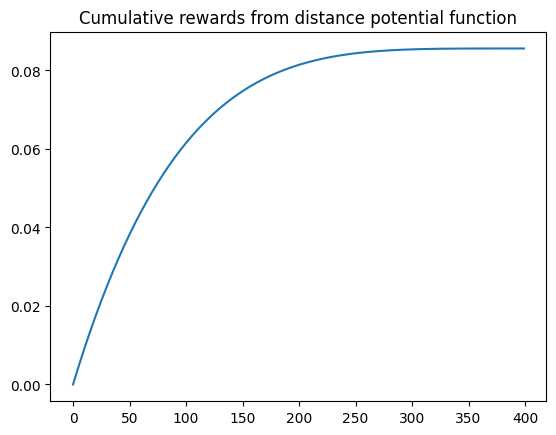

In [ ]:
gamma = 0.99
coef = 20
rewards_potential = np.zeros(realistic_iters)
for i in range(1, realistic_iters):
    dist_prev = (goal_dist - (i - 1) * realistic_improv) / hypotenuse
    dist_curr = (goal_dist - i * realistic_improv) / hypotenuse
    dist_curr = dist_curr**2
    dist_prev = dist_prev**2
    delta_phi = dist_prev - gamma * dist_curr  # positive if the distance is decreasing
    rewards_potential[i] = delta_phi * coef

plt.title("Per step raw rewards from distance potential function")
plt.plot(rewards_potential)
plt.show()
plt.title("Cumulative rewards from distance potential function")
plt.plot(np.cumsum(rewards_potential))
plt.show()


## Difference of relativized normalized euclidean potentials

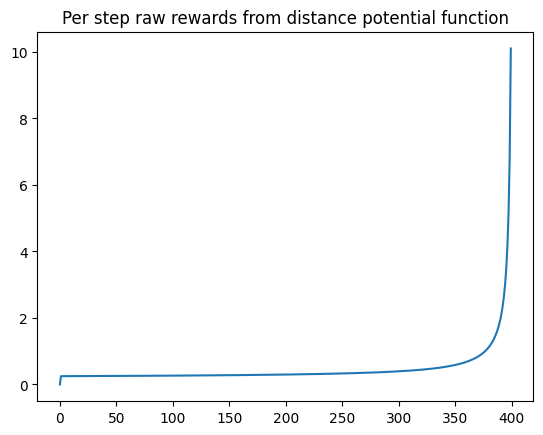

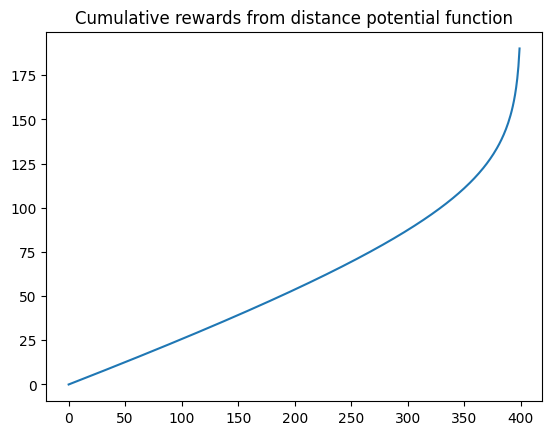

In [ ]:
gamma = 0.99
coef = 20
rewards_potential = np.zeros(realistic_iters)
for i in range(1, realistic_iters):
    dist_prev = (goal_dist - (i - 1) * realistic_improv) # previous euclidean distance
    dist_curr = (goal_dist - i * realistic_improv) # current euclidean distance
    phi_prev = -1
    phi_curr = -dist_curr / (dist_prev+ 1e-6)  # potential function
    delta_phi = gamma * phi_curr - phi_prev  # positive if the distance is decreasing
    rewards_potential[i] = delta_phi * coef

plt.ylabel("Reward")

plt.title("Per step raw rewards from distance potential function")
plt.plot(rewards_potential)
plt.show()
plt.title("Cumulative rewards from distance potential function")
plt.plot(np.cumsum(rewards_potential))
plt.show()


## Summed potentials